Replicate https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1

but using "keras with tensorflow backend" instead of tensorflow directly

## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
import utils
from matplotlib import pyplot as plt

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


Using TensorFlow backend.


## Generate data

X [[  5.48813504e-01   7.15189366e-01   3.65816378e-01   2.61627984e-01
    8.45505553e-02   6.45894113e-01]
 [  4.37587211e-01   8.91773001e-01   7.09190581e-01   6.32437012e-01
    6.66350154e-02   5.28894920e-01]
 [  5.68044561e-01   9.25596638e-01   7.92985609e-01   7.33984814e-01
    1.57032938e-01   8.32619846e-01]
 [  7.78156751e-01   8.70012148e-01   6.58530585e-01   5.72929609e-01
    3.56657945e-01   7.80529176e-01]
 [  1.18274426e-01   6.39921021e-01   2.62046963e-01   1.67689360e-01
    6.77524960e-04   4.14661940e-01]
 [  2.64555612e-01   7.74233689e-01   4.64104944e-01   3.59325683e-01
    1.10992866e-02   6.17635497e-01]
 [  6.12095723e-01   6.16933997e-01   2.34809741e-01   1.44862112e-01
    8.72841608e-02   4.37031954e-01]
 [  6.97631196e-01   6.02254716e-02   2.18444256e-04   1.31559083e-05
    1.23151044e-03   1.28926298e-01]
 [  3.15428351e-01   3.63710771e-01   4.81136702e-02   1.74994601e-02
    4.15159042e-03   1.02044811e-01]
 [  2.08876756e-01   1.61309518e-01

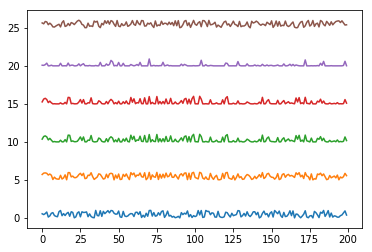

In [2]:
N=100000

# Try dataset from https://stats.stackexchange.com/questions/190148/autoencoder-pca-tensorflow?rq=1
from sklearn.preprocessing import scale
def data1(n_samples:int=2000, n_features:int=5):
    # n_samples, n_features = 2000, 5
    X = np.random.uniform(0, 1, (n_samples, n_features))
    X[:, 2] = X[:, 1]**3
    X[:, 3] = X[:, 1]*X[:, 2]
    X[:, 4] = X[:,1]**2 * X[:, 0]**3
    # auto-encoders need [0-1] range data
    # If PCA input is (mean=0,std=1) and AE is [0-1], MSE is incomparable
    # X = scale(X)
    return X

X = data1(N,6)

print('X',X[0:10,:])

utils.myPlot(X)

## Try matrix of 2-layer AE

autoencoder
d1,d2 :  6 1


/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1977: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


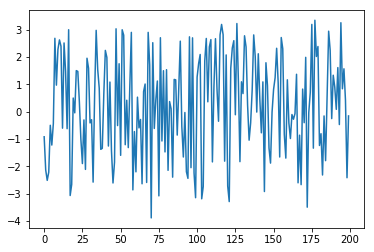

AE mse =  0.376978738878
d1,d2 :  6 2


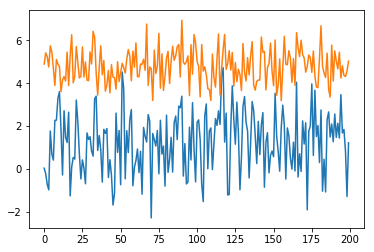

AE mse =  0.256157202323
d1,d2 :  6 3


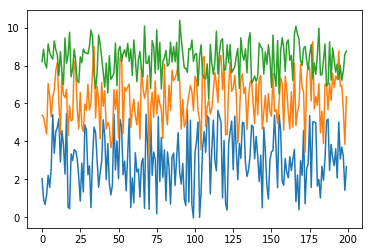

AE mse =  0.0530378798938
d1,d2 :  6 4


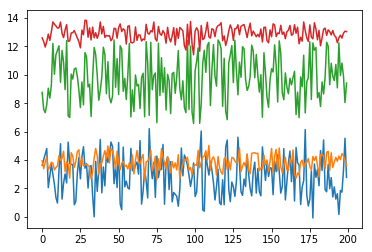

AE mse =  0.0475150953211
d1,d2 :  6 5


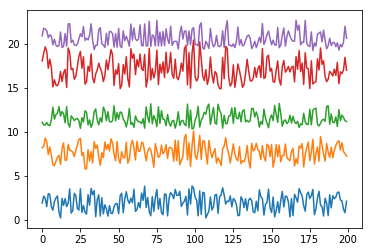

AE mse =  0.0479863695798
d1,d2 :  6 6


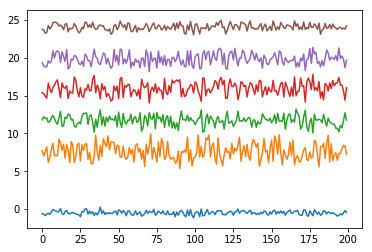

AE mse =  0.0447139277458
d1,d2 :  10 1


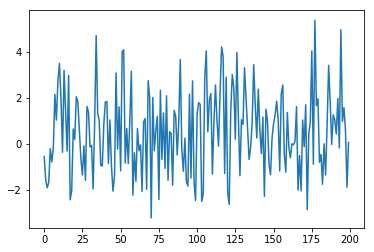

AE mse =  0.376092048194
d1,d2 :  10 2


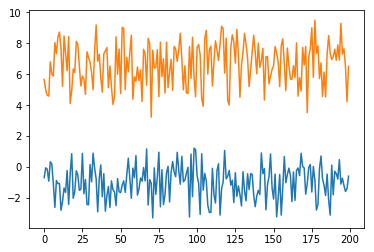

AE mse =  0.257551331108
d1,d2 :  10 3


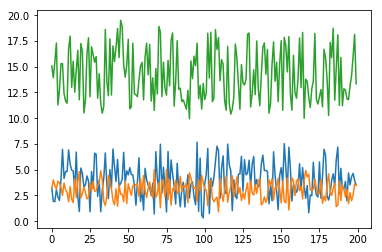

AE mse =  0.0496496834414
d1,d2 :  10 4


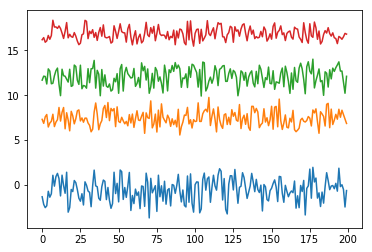

AE mse =  0.0428504553037
d1,d2 :  10 5


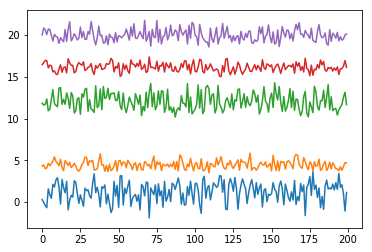

AE mse =  0.0439681292814
d1,d2 :  10 6


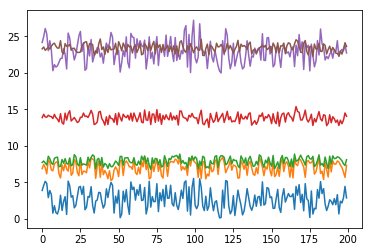

AE mse =  0.0494009016614
d1,d2 :  15 1


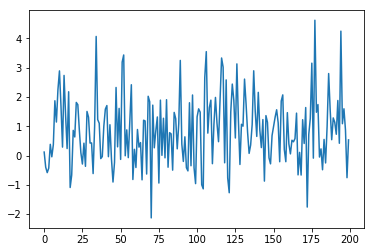

AE mse =  0.374474995573
d1,d2 :  15 2


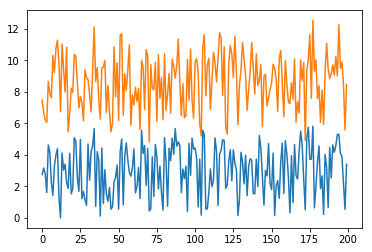

AE mse =  0.257662793066
d1,d2 :  15 3


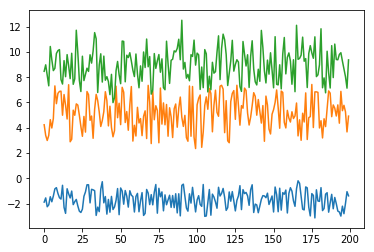

AE mse =  0.0448608921011
d1,d2 :  15 4


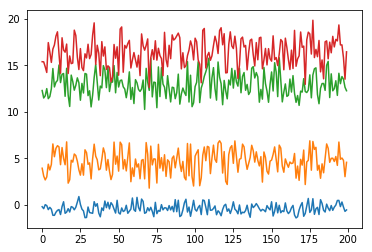

AE mse =  0.03382101339
d1,d2 :  15 5


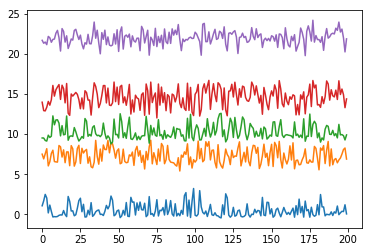

AE mse =  0.0467019385299
d1,d2 :  15 6


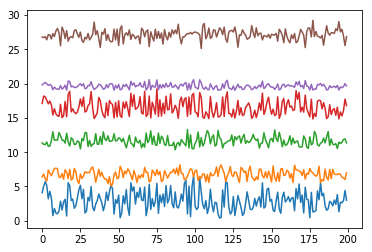

AE mse =  0.0414317453111
d1,d2 :  20 1


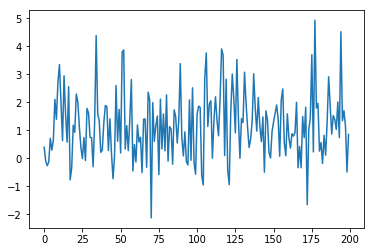

AE mse =  0.373828125753
d1,d2 :  20 2


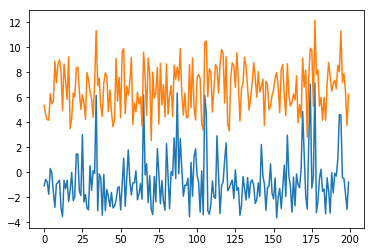

AE mse =  0.252845921174
d1,d2 :  20 3


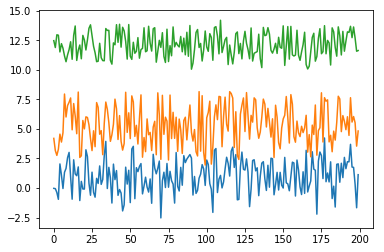

AE mse =  0.0504279700474
d1,d2 :  20 4


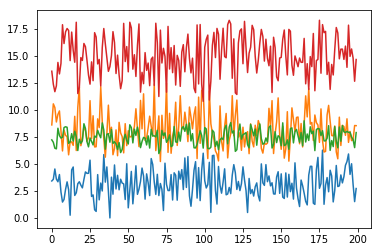

AE mse =  0.0470700933038
d1,d2 :  20 5


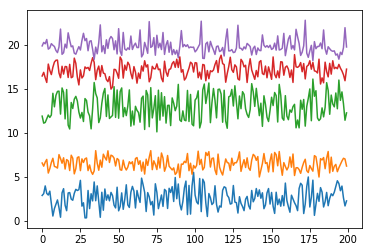

AE mse =  0.0427513558989
d1,d2 :  20 6


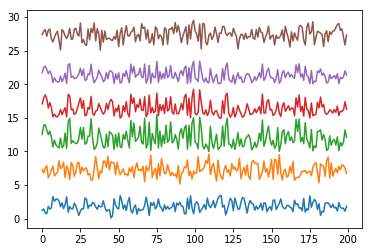

AE mse =  0.04818827917


In [3]:
print("autoencoder")
N_epochs = 25
for d1 in [6,10,15,20]:
    for d2 in [1,2,3,4,5,6]:
        autoencoder, encoder = utils.buildNetwork2_deep(X.shape[1], enc_dim1 = d1, enc_dim2 = d2)
        print("d1,d2 : ",d1,d2)
        utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)

## Matrix of 3-layer AE

autoencoder
d1,d2 :  12 6


/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1977: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


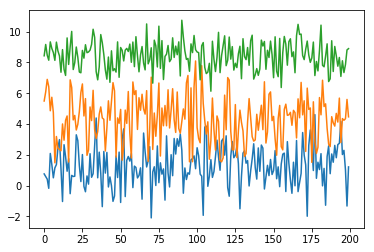

AE mse =  0.0408446254705
results [[ 0.04084463  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  12 10


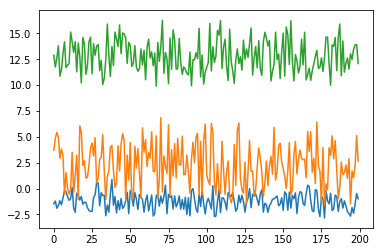

AE mse =  0.0442708605959
results [[ 0.04084463  0.04427086  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  12 15


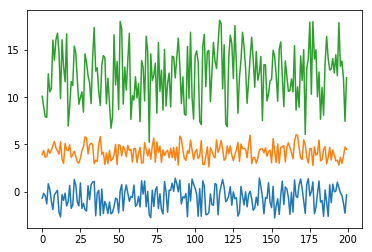

AE mse =  0.0399535808605
results [[ 0.04084463  0.04427086  0.03995358  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  12 20


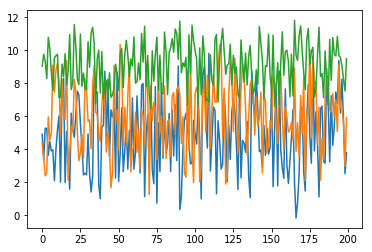

AE mse =  0.0436820405581
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  20 6


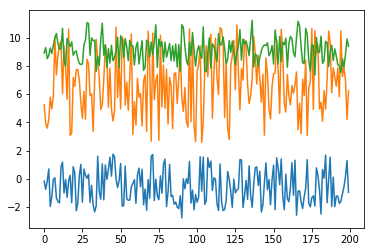

AE mse =  0.0405770948277
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  20 10


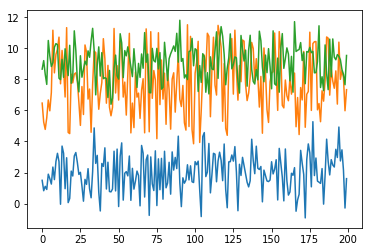

AE mse =  0.0436007777868
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  20 15


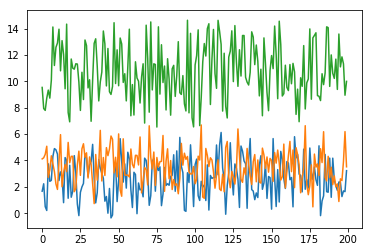

AE mse =  0.0483183442134
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  20 20


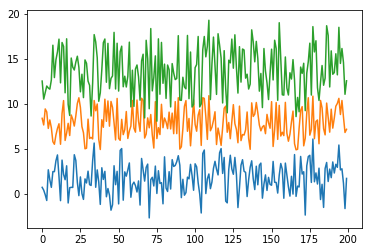

AE mse =  0.03931801863
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  30 6


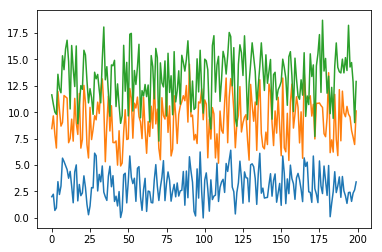

AE mse =  0.0392487349231
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  30 10


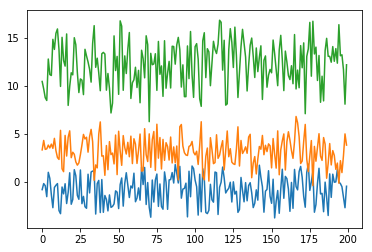

AE mse =  0.0463832669995
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  30 15


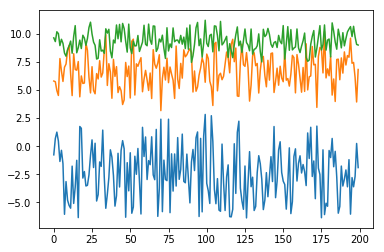

AE mse =  0.0417536458361
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  30 20


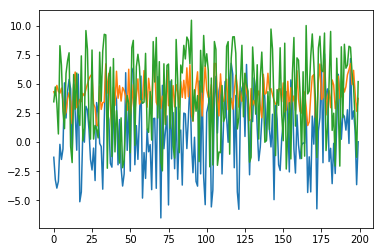

AE mse =  0.15270475834
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.15270476]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  40 6


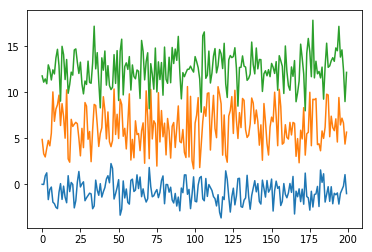

AE mse =  0.0374320315456
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.15270476]
 [ 0.03743203  0.          0.          0.        ]]
d1,d2 :  40 10


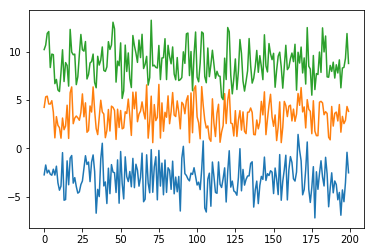

AE mse =  0.0464534836957
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.15270476]
 [ 0.03743203  0.04645348  0.          0.        ]]
d1,d2 :  40 15


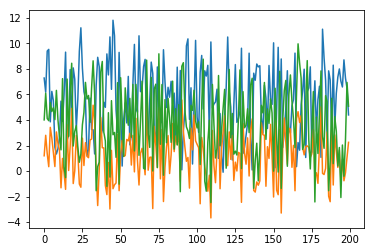

AE mse =  0.0474265262434
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.15270476]
 [ 0.03743203  0.04645348  0.04742653  0.        ]]
d1,d2 :  40 20


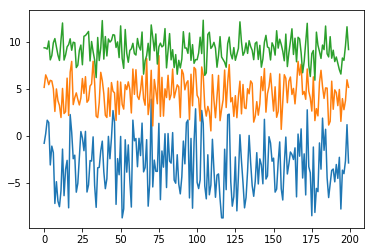

AE mse =  0.0419419909651
results [[ 0.04084463  0.04427086  0.03995358  0.04368204]
 [ 0.04057709  0.04360078  0.04831834  0.03931802]
 [ 0.03924873  0.04638327  0.04175365  0.15270476]
 [ 0.03743203  0.04645348  0.04742653  0.04194199]]


In [3]:
print("autoencoder")
N_epochs = 25
d1_all = [12,20,30,40]
d2_all = [ 6,10,15,20]
results = np.zeros(shape=(len(d1_all),len(d2_all)))
for d1_i in range(len(d1_all)):
    for d2_i in range(len(d2_all)):
        d1 = d1_all[d1_i]
        d2 = d2_all[d2_i]
        autoencoder, encoder = utils.buildNetwork2_deep(X.shape[1], enc_dim1 = d1, enc_dim2 = d2, enc_dim3 = 3)
        print("d1,d2 : ",d1,d2)
        results[d1_i,d2_i] = utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)
        print("results",results)

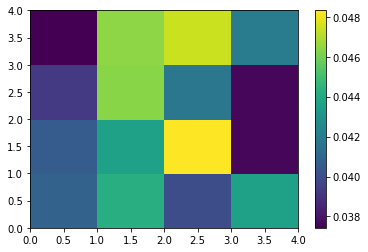

In [16]:
# results heatmap
res2 = results.copy()
res2[1,3]=None #results.mean()#0.04
res2[2,3]=None # results.mean()#0.04
myMean = results.mean()#0.04
res2[1,3]=myMean
res2[2,3]=myMean

plt.pcolor(res2)
plt.colorbar()
plt.show()

## try again

autoencoder
d1,d2 :  640 640


/home/ubuntu/.local/share/virtualenvs/G2ML/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1977: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


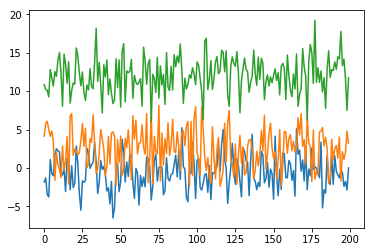

AE mse =  0.0347164025973
results [[ 0.0347164  0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         0.       ]]
d1,d2 :  640 320


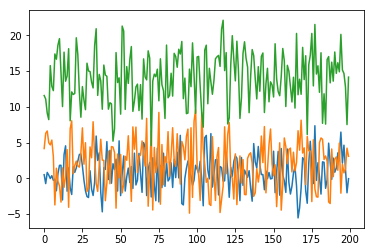

AE mse =  0.0333933559214
results [[ 0.0347164   0.03339336  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  640 160


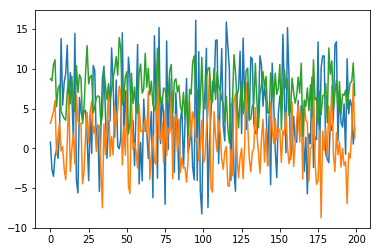

AE mse =  0.0308830734873
results [[ 0.0347164   0.03339336  0.03088307  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  640 80


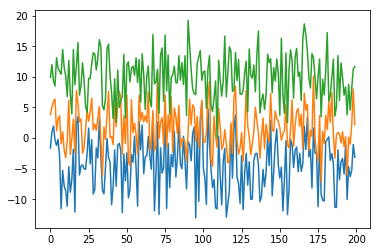

AE mse =  0.0330489803185
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  320 640


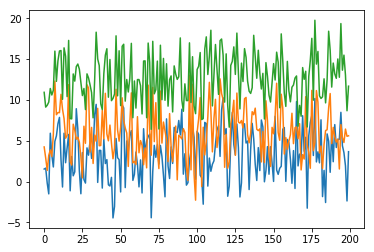

AE mse =  0.0322523915119
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.03225239  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  320 320


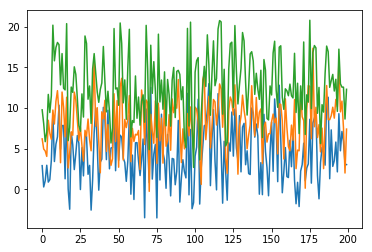

AE mse =  0.0377138164285
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.03225239  0.03771382  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  320 160


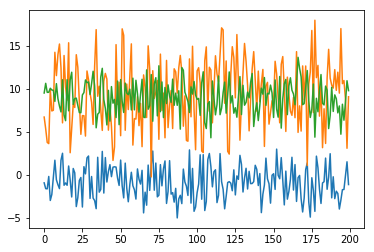

AE mse =  0.0326290089874
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.03225239  0.03771382  0.03262901  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  320 80


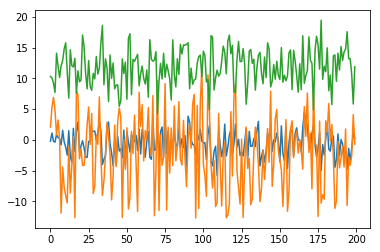

AE mse =  0.0325585406528
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.03225239  0.03771382  0.03262901  0.03255854]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  160 640


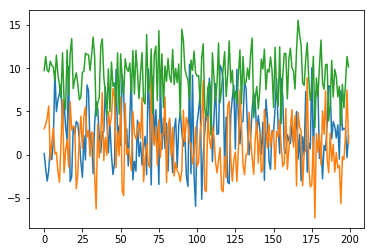

AE mse =  0.0391951417307
results [[ 0.0347164   0.03339336  0.03088307  0.03304898]
 [ 0.03225239  0.03771382  0.03262901  0.03255854]
 [ 0.03919514  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
d1,d2 :  160 320


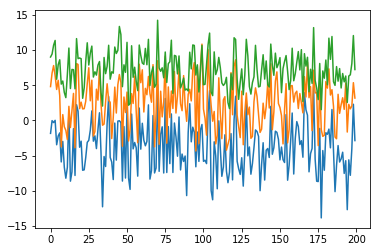

In [ ]:
print("autoencoder")
N_epochs = 25
d1_all = [640,320,160,80] # [12,20,30,40]
d2_all = [640,320,160,80] # [ 6,10,15,20]
results = np.zeros(shape=(len(d1_all),len(d2_all)))
for d1_i in range(len(d1_all)):
    for d2_i in range(len(d2_all)):
        d1 = d1_all[d1_i]
        d2 = d2_all[d2_i]
        autoencoder, encoder = utils.buildNetwork2_deep(
            X.shape[1],
            enc_dim1 = d1,
            enc_dim2 = d2,
            enc_dim3 = 6,
            enc_dim4 = 3
        )
        print("")
        print("d1,d2 : ",d1,d2)
        results[d1_i,d2_i] = utils.ae_fit_encode_plot_mse(X, autoencoder, encoder, N_epochs, verbose=0)
        print("results",results)

In [ ]:
# results heatmap
res2 = results.copy()
#res2[1,3]=None #results.mean()#0.04
#res2[2,3]=None # results.mean()#0.04
#myMean = results.mean()#0.04
#res2[1,3]=myMean
#res2[2,3]=myMean

plt.pcolor(res2)
plt.colorbar()
plt.show()